In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

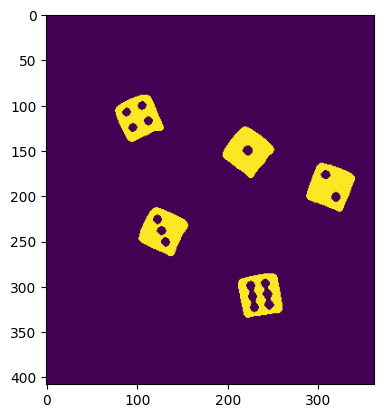

In [2]:
img2 = cv2.imread('photos/dice_orange-bg.jpg')[:, 200:-50]
img2 = cv2.medianBlur(img2, 5)
img2 = cv2.medianBlur(img2, 5)

gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
Blur2 = cv2.GaussianBlur(img2, (5,5), 1)
lapl = cv2.medianBlur(img2, 5)

ret, binarized2 = cv2.threshold(img2[:,:,1], 170, 255, cv2.THRESH_BINARY)

cv2.erode(binarized2[:,:], np.ones((1,1), np.uint8))

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

image_1 = cv2.erode(binarized2, kernel)
image_2 = cv2.dilate(image_1, kernel)

image_3 = cv2.morphologyEx(binarized2, cv2.MORPH_OPEN, kernel)

plt.imshow(binarized2)

In [3]:
contours = cv2.findContours(binarized2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0]

cntrRect = []
for i in contours:
        epsilon = 0.05*cv2.arcLength(i,True)
        approx = cv2.approxPolyDP(i,epsilon,True)
        if len(approx) == 4:
            cv2.drawContours(img2,cntrRect,-1,(0,255,0),2)
            cv2.imshow('Roi Rect ONLY',img2)
            cntrRect.append(approx)

cv2.waitKey(0)
cv2.destroyAllWindows()

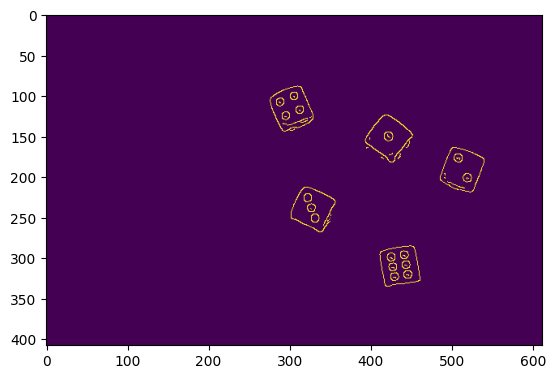

In [7]:
img = cv2.imread('photos/dice_orange-bg.jpg')
roi = img[:, :]

gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
Blur = cv2.GaussianBlur(gray, (5,5), 1)
binarized = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
Canny = cv2.Canny(Blur, 10, 50)
plt.imshow(Canny)
plt.show()

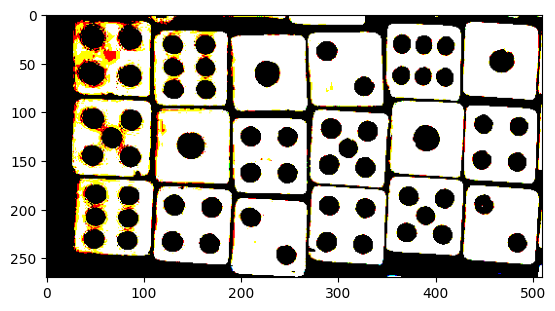

In [186]:
img = cv2.imread('photos/test.jpg')
roi = img[730:1000, 320:830]

ret, binarized_2 = cv2.threshold(roi, 200, 255, cv2.THRESH_BINARY)
plt.imshow(binarized_2)
plt.show()

In [8]:
contours = cv2.findContours(Canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0]

cntrRect = []
for i in contours:
        epsilon = 0.05*cv2.arcLength(i,True)
        approx = cv2.approxPolyDP(i,epsilon,True)
        if len(approx) == 4:
            cv2.drawContours(roi,cntrRect,-1,(0,255,0),2)
            cv2.imshow('Roi Rect ONLY',roi)
            cntrRect.append(approx)

cv2.waitKey(0)
cv2.destroyAllWindows()
